<h1 align="center"><font color = #119fbf>Previsão de Churn</font></h1>

## 1 - Problema de Negócio

**Contexto**
A taxa de churn é uma métrica essencial que indica a porcentagem de clientes que cancelam um serviço em determinado período de tempo em uma empresa. É um fator de extrema importância, pois, além de atrair novos clientes, é fundamental garantir a retenção dos clientes existentes. Compreender a taxa de churn é essencial para estabelecer estratégias de integração entre o cliente e o produto, agregar valor ao serviço e, consequentemente, manter esses clientes, o que impacta diretamente nos lucros e na receita da empresa.

Por exemplo, nas plataformas de streaming de assinatura, como Netflix, HBO Max e Amazon Prime, quando os clientes começam a cancelar os planos, é necessário investigar as razões por trás disso, como problemas de usabilidade, preços das mensalidades ou qualidade do serviço.

Neste projeto, serão utilizados algoritmos de Suporte Vector Machine (SVM) e Redes Neurais Artificiais (RNA) para prever a rotatividade de clientes em uma empresa fictícia de telecomunicações. 

**Dataset**
[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Sobre o conjunto de dados**

O conjunto de dados contém informações sobre a rotatividade de clientes da Telco, uma empresa de telecomunicações fictícia, que fornecia serviços de telefone residencial e Internet para 7.043 clientes na Califórnia no terceiro trimestre. Ele indica quais clientes saíram, permaneceram ou se inscreveram em seu serviço.

Cada linha representa um cliente, cada coluna contém os atributos do cliente descritos na coluna Metadados. O conjunto de dados inclui informações sobre:


 - customerID: Identificação do cliente
 - gender: Gênero do cliente
 - SeniorCitizen: Cliente idoso ou não
 - Partner: Cliente possui parceiro ou não
 - Dependents: Cliente possui dependentes ou não
 - tenure: Quantidade de meses que o cliente permaneceu na empresa
 - PhoneService: Se o cliente possui serviço de telefonia
 - MultipleLines: Se o cliente possui serviço de várias linhas
 - InternetService: Se o cliente possui serviço de Internet
 - OnlineSecurity: Se o cliente possui serviço de segurança online
 - OnlineBackup: Se o cliente possui serviço de backup online
 - DeviceProtection: Se o cliente possui serviço de proteção de dispositivos
 - TechSupport: Se o cliente possui serviço de suporte técnico
 - StreamingTV: Se o cliente possui serviço de streaming de TV
 - StreamingMovies: Se o cliente possui serviço de streaming de filmes
 - Contract: Vigência do contrato do cliente
 - PaperlessBilling: Se o cliente possui cobrança sem papel
 - PaymentMethod: Método de pagamento
 - MonthlyCharges: Valor cobrado do cliente mensalmente
 - TotalCharges: Valor total cobrado do cliente
 - Churn: Se o cliente saiu no último mês ou não

**Importações**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm

## 2 - Análise Exploratória dos Dados

**Carregando o dataset**

In [ ]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv', sep=',')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Informações sobre o DataFrame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Padronizar valores e tipos de dados no dataset**: SeniorCitizen e TotalCharges

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Informações Estatísticas**

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


**Informações estatísticas para as variáveis categóricas**

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


#### Tratamento de Valores Nulos

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Substituir os valores NaN da coluna 'TotalCharges' pela mediana dos valores**

In [ ]:
mediana = sts.median(df['TotalCharges'])
mediana

6296.75

In [ ]:
df['TotalCharges'].fillna(mediana, inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Tratamento de Valores Duplicados

In [ ]:
df.duplicated().sum()

0

### Visualizando algumas informações

**Verificando a ocorrência de Churn**

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

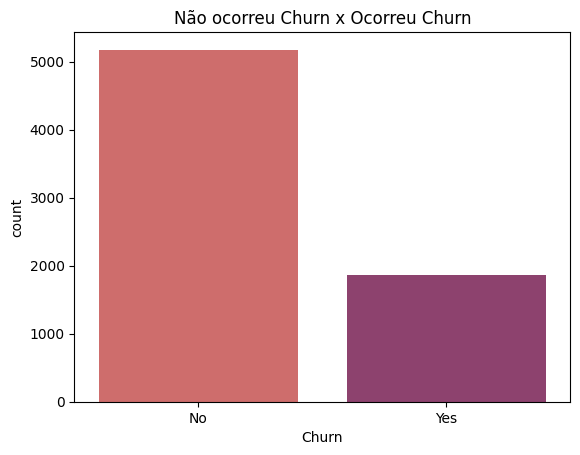

In [ ]:
sns.countplot(x='Churn', data=df, palette="flare")
plt.title('Não ocorreu Churn x Ocorreu Churn');

**Informações demográficas sobre os clientes: Sexo, faixa etária, parceiros e dependentes**

In [ ]:
def plot_annotate(ax, title):
    for rect in ax.patches:
        ax.annotate(rect.get_height(),
                (rect.get_x() + rect.get_width()/2, rect.get_height()),
                ha='center', va='baseline', fontsize=12, color='black',
                xytext=(0, 1), textcoords="offset points")
    ax.set_title(title)

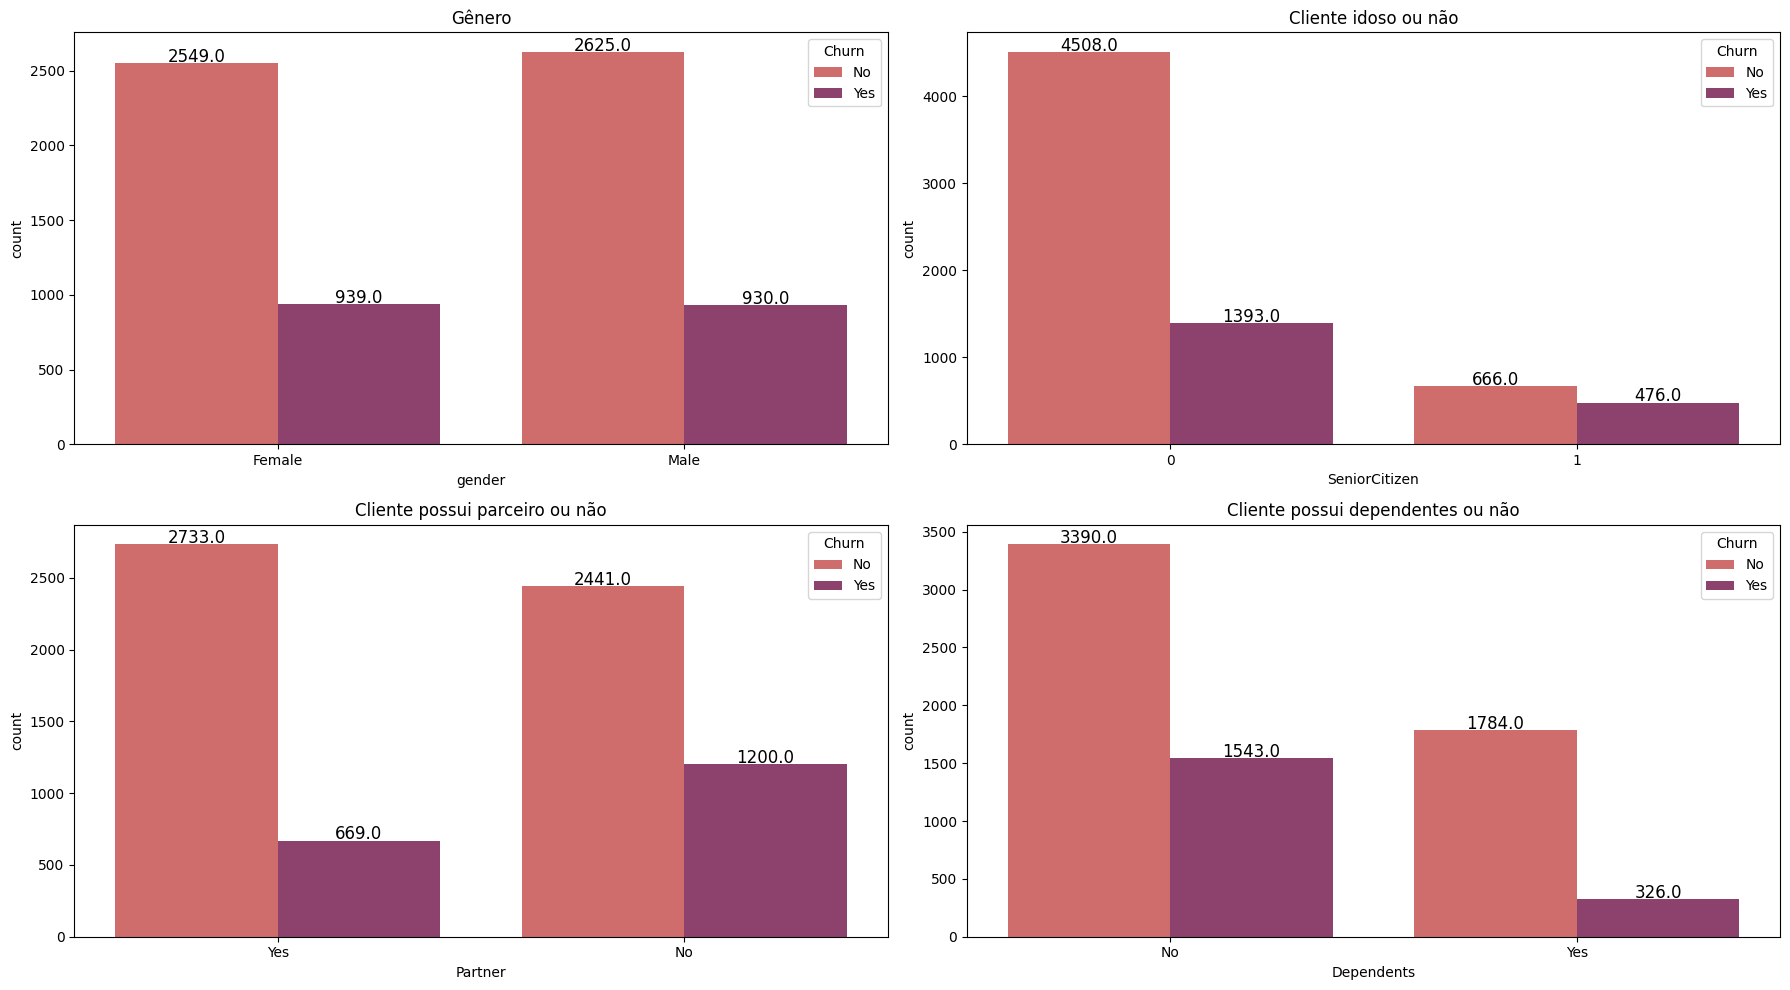

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18,10))

ax = sns.countplot(x='gender', data=df, palette="flare", ax=axs[0][0], hue = "Churn")
ax1 = sns.countplot(x='SeniorCitizen', data=df, palette="flare", ax=axs[0][1], hue = "Churn")
ax2 = sns.countplot(x='Partner', data=df, palette="flare", ax=axs[1][0], hue = "Churn")
ax3 = sns.countplot(x='Dependents', data=df, palette="flare", ax=axs[1][1], hue = "Churn")

plot_annotate(ax, 'Gênero')
plot_annotate(ax1, "Cliente idoso ou não")
plot_annotate(ax2, "Cliente possui parceiro ou não")
plot_annotate(ax3, "Cliente possui dependentes ou não")

plt.tight_layout()
plt.show()

**Informações sobre os serviços para os quais cada cliente se inscreveu:**

- Telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes.

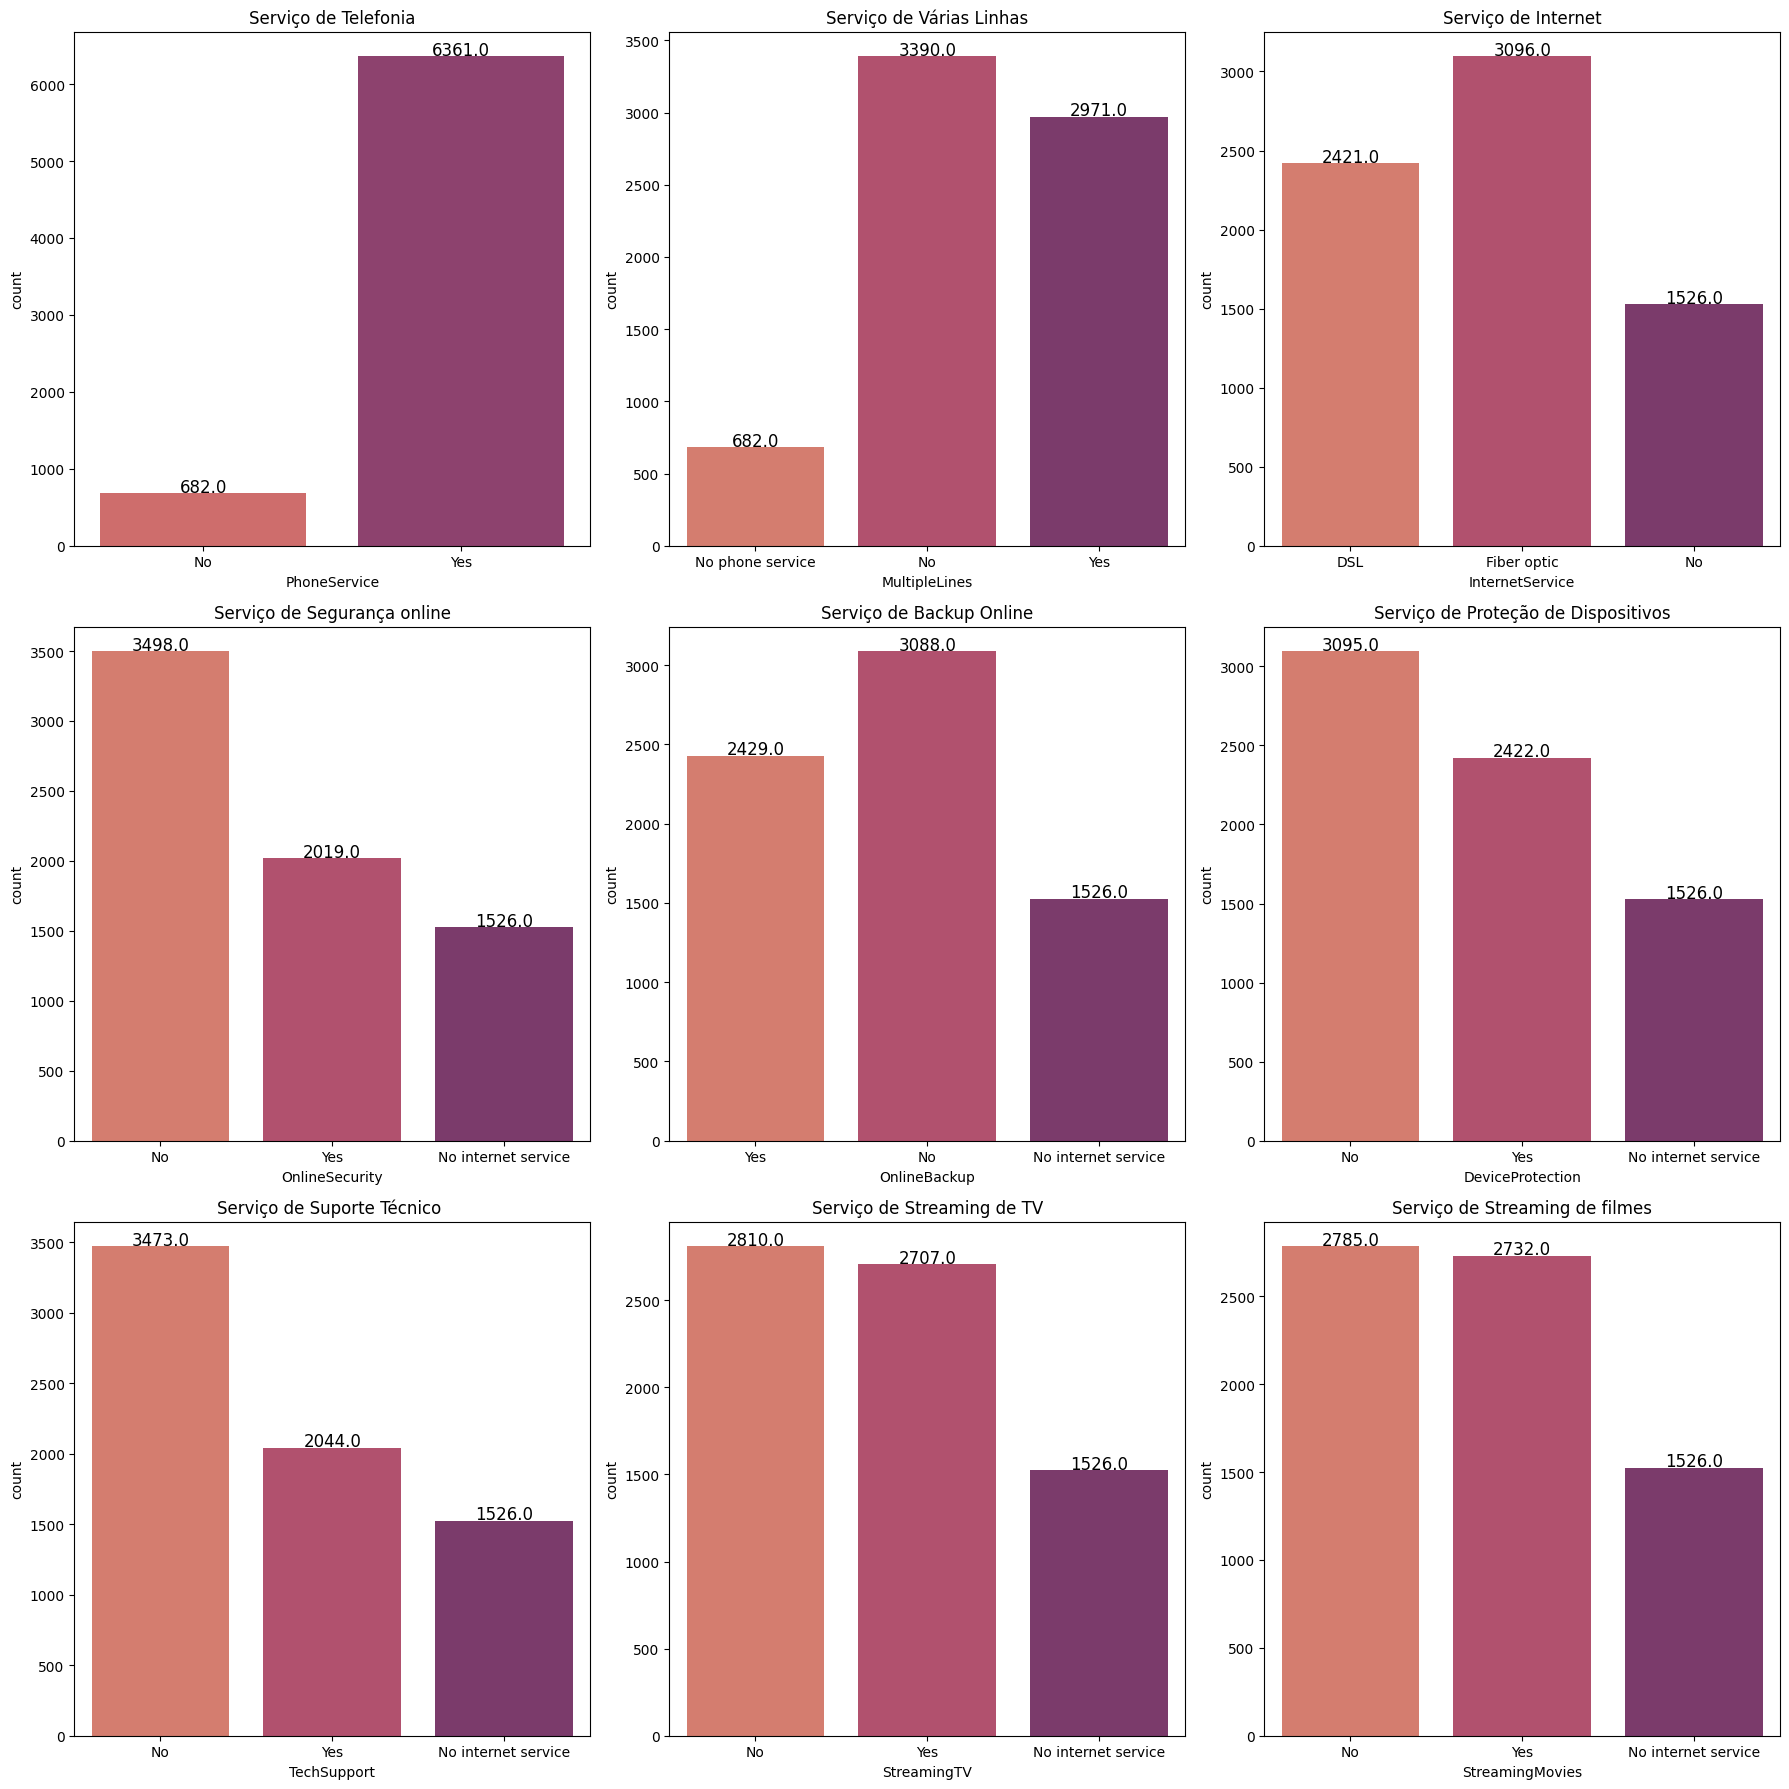

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))

ax = sns.countplot(x='PhoneService', data=df, palette="flare", ax=axs[0][0])
ax1 = sns.countplot(x='MultipleLines', data=df, palette="flare", ax=axs[0][1])
ax2 = sns.countplot(x='InternetService', data=df, palette="flare", ax=axs[0][2])
ax3 = sns.countplot(x='OnlineSecurity', data=df, palette="flare", ax=axs[1][0])
ax4 = sns.countplot(x='OnlineBackup', data=df, palette="flare", ax=axs[1][1])
ax5 = sns.countplot(x='DeviceProtection', data=df, palette="flare", ax=axs[1][2])
ax6 = sns.countplot(x='TechSupport', data=df, palette="flare", ax=axs[2][0])
ax7 = sns.countplot(x='StreamingTV', data=df, palette="flare", ax=axs[2][1])
ax8 = sns.countplot(x='StreamingMovies', data=df, palette="flare", ax=axs[2][2])

plot_annotate(ax, 'Serviço de Telefonia')
plot_annotate(ax1, "Serviço de Várias Linhas")
plot_annotate(ax2, "Serviço de Internet")
plot_annotate(ax3, "Serviço de Segurança online")
plot_annotate(ax4, "Serviço de Backup Online")
plot_annotate(ax5, "Serviço de Proteção de Dispositivos")
plot_annotate(ax6, "Serviço de Suporte Técnico ")
plot_annotate(ax7, "Serviço de Streaming de TV")
plot_annotate(ax8, "Serviço de Streaming de filmes")

plt.tight_layout()
plt.show()

**Informações da conta do cliente:**

– Quanto tempo ele é cliente, contrato, método de pagamento, cobrança sem papel, cobranças mensais e cobranças totais.

**Quantos meses que o cliente permaneceu**

In [ ]:
qnt_meses = df['tenure'].value_counts().reset_index()
qnt_meses.columns= ['tenure', 'Count']

fig = px.treemap(qnt_meses, path=['tenure'], values='Count', labels={'tenure'})
fig.show()

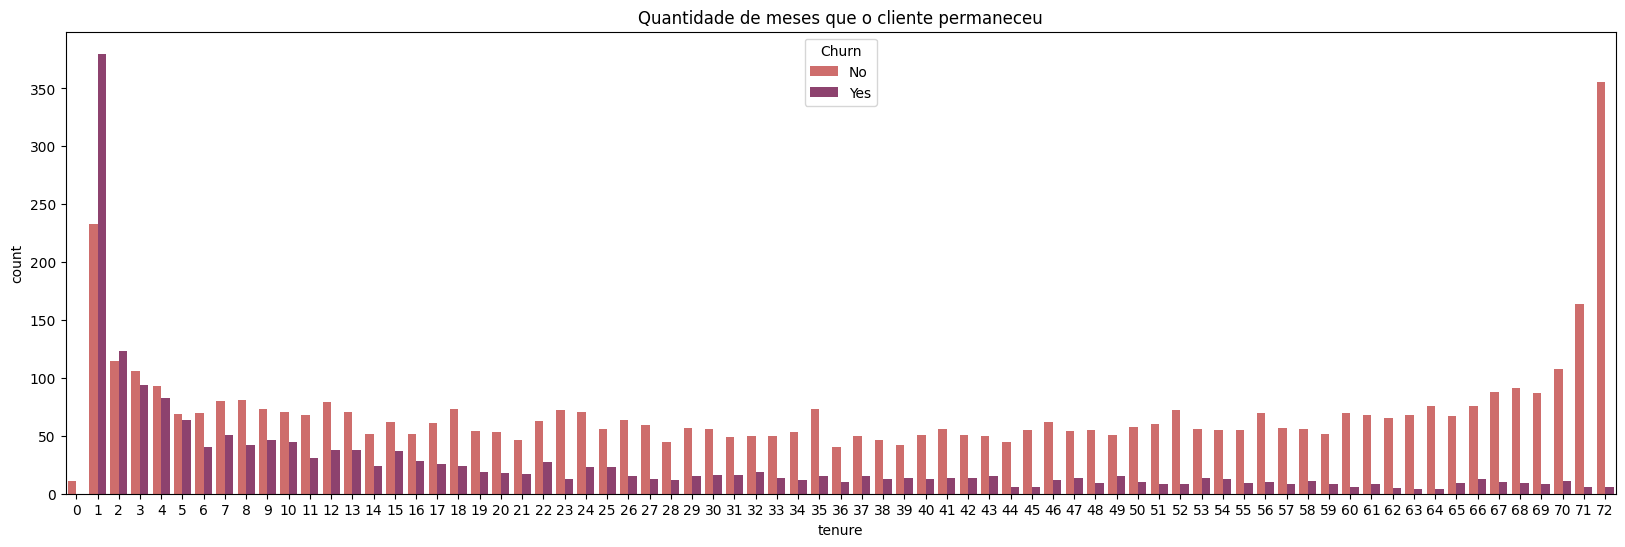

In [ ]:
fig, axs = plt.subplots(figsize=(20, 6))
ax = sns.countplot(x='tenure', data=df, palette="flare", hue = "Churn").set_title('Quantidade de meses que o cliente permaneceu')
plt.show()

**Distribuição dos dados em relação a quantidade de meses, valor cobrado mensalmente e valor total cobrado**

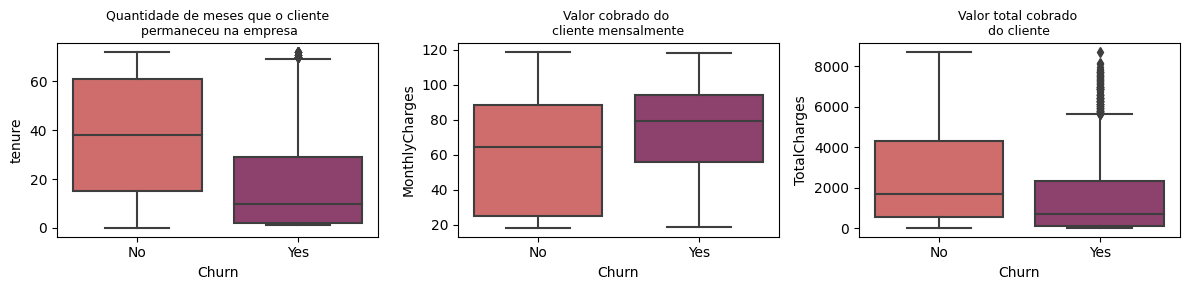

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.boxplot(data=df, x="Churn", y="tenure", palette="flare", ax=axs[0]).set_title('Quantidade de meses que o cliente\n permaneceu na empresa', fontsize=9)
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="flare", ax=axs[1]).set_title('Valor cobrado do \ncliente mensalmente', fontsize=9)
sns.boxplot(data=df, x="Churn", y="TotalCharges", palette="flare", ax=axs[2]).set_title('Valor total cobrado \ndo cliente', fontsize=9)

plt.tight_layout()
plt.show()

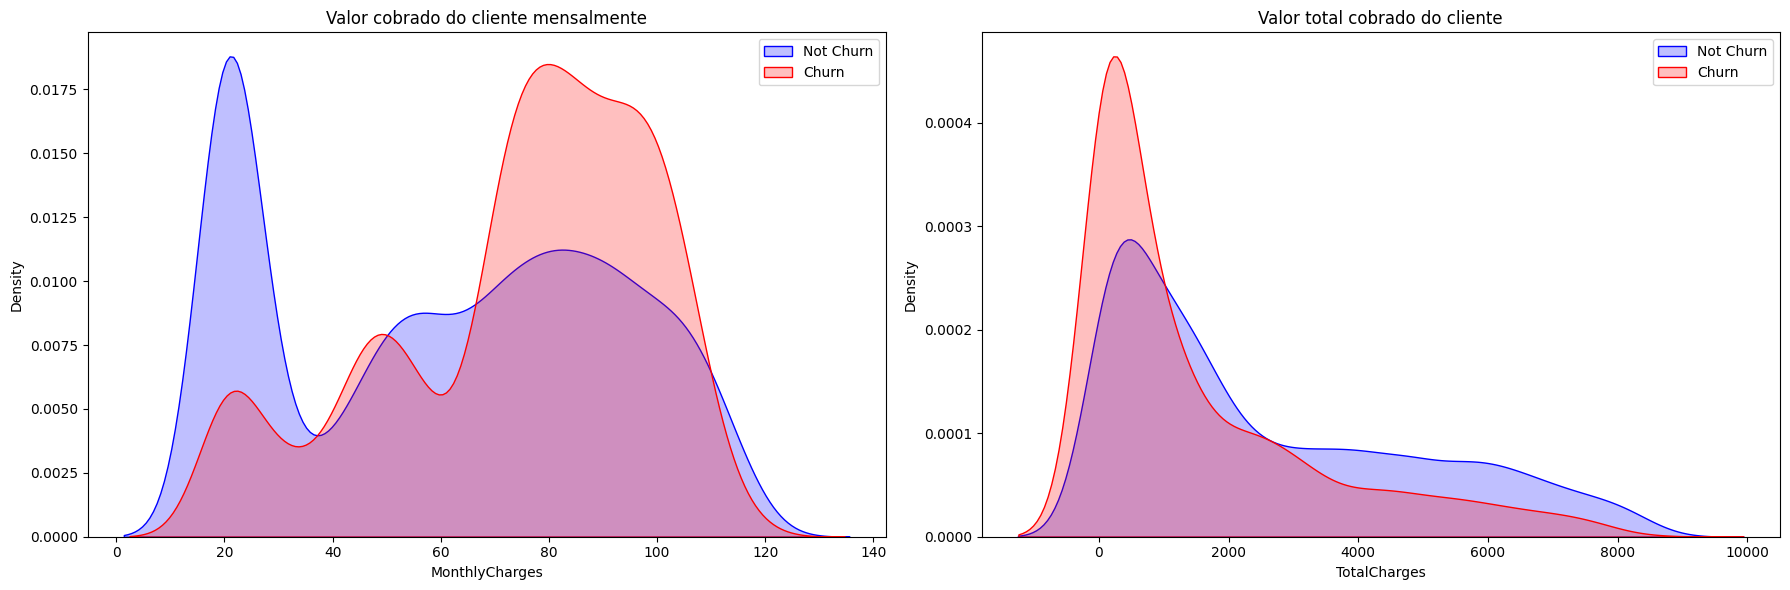

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], color="Blue", fill=True, ax=axs[0]).set_title('Valor cobrado do cliente mensalmente');
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], color="Red", fill=True, ax=axs[0]).set_title('Valor cobrado do cliente mensalmente');

sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')], color="Blue", fill=True, ax=axs[1]).set_title('Valor total cobrado do cliente');
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')], color="Red", fill=True, ax=axs[1]).set_title('Valor total cobrado do cliente');

axs[0].legend(["Not Churn", "Churn"], loc='upper right')
axs[1].legend(["Not Churn", "Churn"], loc='upper right')

plt.tight_layout()
plt.show()

**Informações sobre vigência do contrato, cobrança sem papel e método de pagamento**

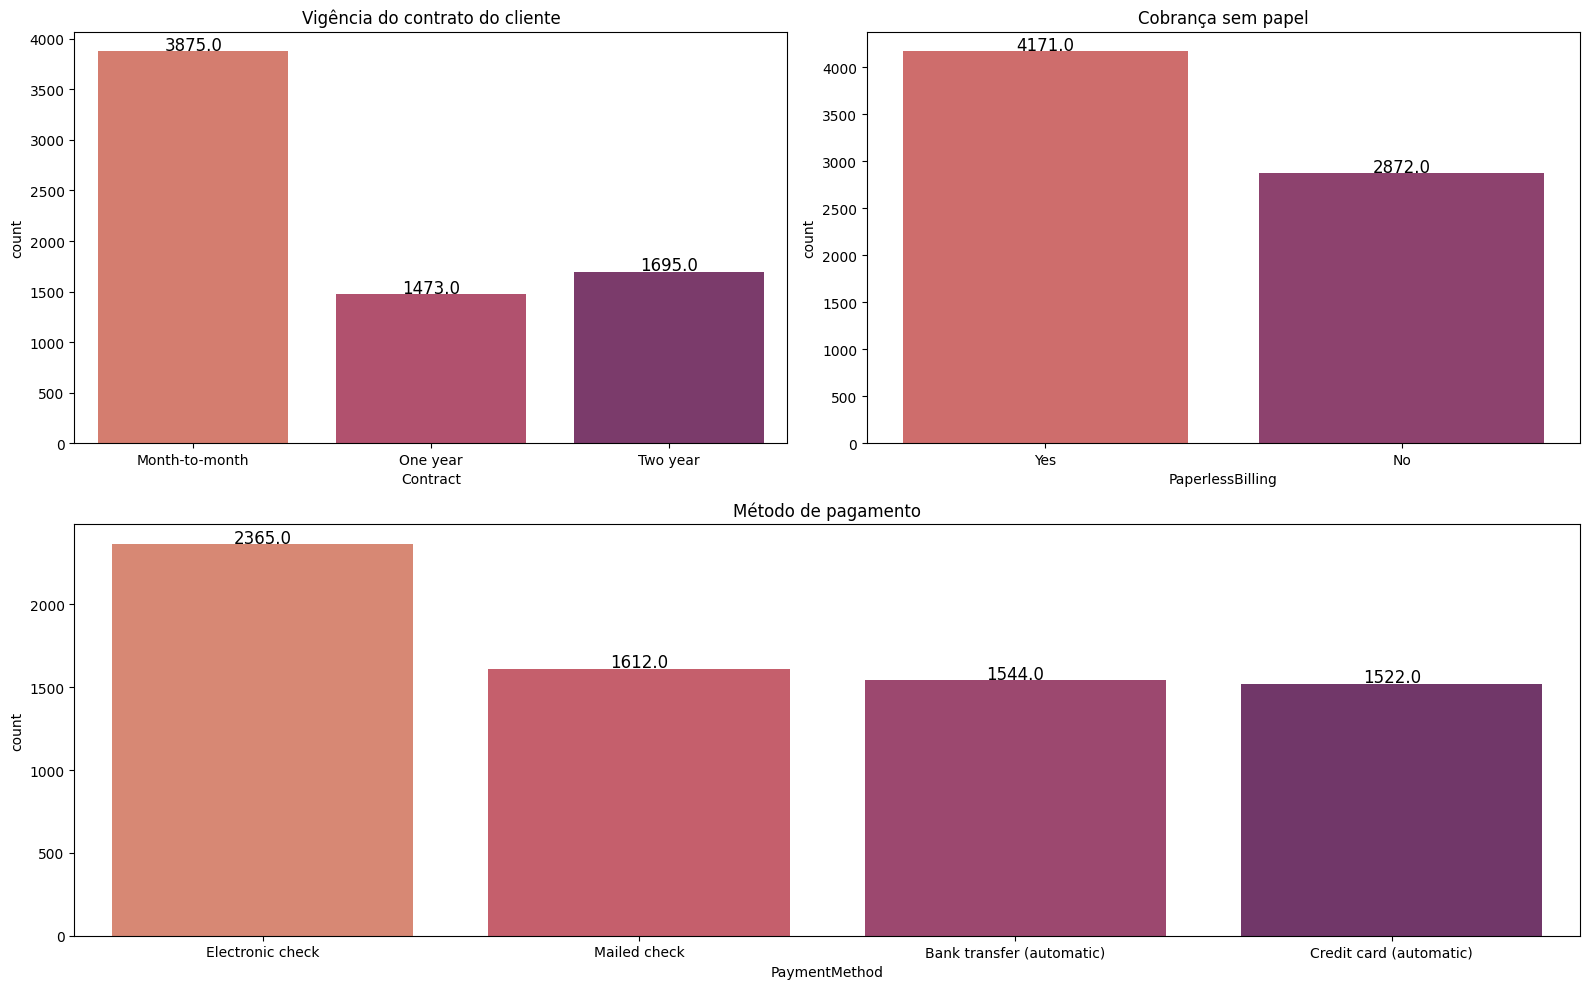

In [ ]:
fig, axs = plt.subplot_mosaic("""AB
                                 CC""", figsize=(16,10))

ax1 = sns.countplot(x='Contract', data=df, palette="flare", ax=axs['A'])#, hue = "Churn")
ax2 = sns.countplot(x='PaperlessBilling', data=df, palette="flare", ax=axs['B'])#, hue = "Churn")
ax3 = sns.countplot(x='PaymentMethod', data=df, palette="flare", ax=axs['C'])#, hue = "Churn")

plot_annotate(ax1, 'Vigência do contrato do cliente')
plot_annotate(ax2, "Cobrança sem papel")
plot_annotate(ax3, "Método de pagamento")

plt.tight_layout()
plt.show()

## 3- Pré-processamento dos dados

**Excluindo a coluna ID**

In [ ]:
df.drop(['customerID'], axis=1, inplace=True)

#### Codificação de dados Categóricos

> One-hot-encoder: A codificação one-hot é uma etapa importante para preparar o conjunto de dados para uso no aprendizado de máquina. A codificação one-hot transforma os dados categóricos em uma representação vetorial binária.

**Exemplo:**

- Serviço de internet = 'DSL', 'Fiber optic', 'No'


 index | servico_DSL | servico_FiberOptic | servico_No
--------- | -------- | -------- | --------
index_dsl | 1 |	0 | 0
index_fiber | 0 |	1 | 0
index_no | 0 | 0 |	1



In [ ]:
for coluna in df.columns:
  print(f'{coluna}: {df[coluna].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: ['0' '1']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Total

In [ ]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
mapeamento = {'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1, '0': 0, '1': 1}

for coluna in columns:
    df[coluna] = df[coluna].map(mapeamento)

In [ ]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


#### Normalização dos dados

> Transformar/Redimensionar os valores de diferentes variáveis para a mesma ordem de grandeza [0, 1] antes de serem utilizadas em algoritmos de ML;

> É uma prática para evitar que o algoritmo fique enviesado para as variáveis com maior ordem de grandeza;

> Normalização Min-Max.

In [ ]:
norm = MinMaxScaler()

df_encoded['tenure'] = norm.fit_transform(df_encoded['tenure'].values.reshape(-1, 1))
df_encoded['MonthlyCharges'] = norm.fit_transform(df_encoded['MonthlyCharges'].values.reshape(-1, 1))
df_encoded['TotalCharges'] = norm.fit_transform(df_encoded['TotalCharges'].values.reshape(-1, 1))

In [ ]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
df_encoded['tenure'].max()

1.0

### Divisão dos dados em treinamento e teste

In [ ]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(5634, 40)
(1409, 40)
(5634,)
(1409,)


### Balanceamento dos dados

SMOTE = Técnica usada para o balanceamento dos dados. Nesse caso, são gerados exemplos sintéticos para a classe minoritária. O SMOTE é útil quando a classe minoritária possui regiões onde há uma escassez de exemplos, e a criação de exemplos sintéticos pode preencher essas regiões.

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

0    4139
1    4139
Name: Churn, dtype: int64


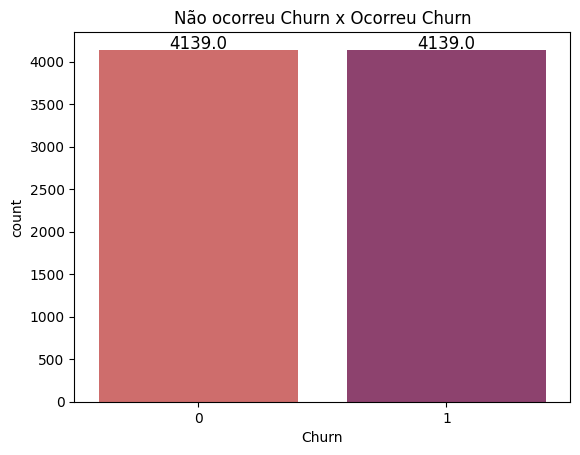

In [ ]:
print(y_train_smote.value_counts())
ax1 = sns.countplot(x=y_train_smote, palette="flare")
plot_annotate(ax1, 'Não ocorreu Churn x Ocorreu Churn')

## 4 - Criação dos modelos

###Grid Search

Auxilia na determinação de valores adequados para os hiperparâmetros e no controle da complexidade do modelo.

**Hiperparâmetros MLP:**

- **hidden_layer_sizes:** Número de neurônios e camadas ocultas

- **activation:** Função de ativação

- **solver:** Otimizador

**Hiperparâmetros SVM:**

- **kernel:** Especifica o tipo de kernel a ser usado no algoritmo


In [ ]:
def grid_search(X_train, y_train, param_grid, model):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("Melhores hiperparâmetros:", grid_search.best_params_)
    print("Acurácia no conjunto de teste:", grid_search.best_estimator_.score(X_test, y_test))
    print("Melhor Pontuação de validação cruzada: ", grid_search.best_score_)

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100), (100, 100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam']
}

mlp = MLPClassifier()

In [ ]:
param_grid_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

model_svm = svm.SVC()

In [ ]:
grid_search(X_train_smote, y_train_smote, param_grid_mlp, mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

Melhores hiperparâmetros: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Acurácia no conjunto de teste: 0.7530163236337828
Melhor Pontuação de validação cruzada:  0.8306461899966433


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
grid_search(X_train_smote, y_train_smote, param_grid_svm, model_svm)

Melhores hiperparâmetros: {'kernel': 'poly'}
Acurácia no conjunto de teste: 0.7707594038325053
Melhor Pontuação de validação cruzada:  0.8232748077119547


### Treinamento dos Modelos

In [ ]:
def train(X, y, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    val_acc, test_acc = [], []

    for train_index, val_index in kf.split(X, y):

        x_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train1, y_val = y.iloc[train_index], y.iloc[val_index]

        # Treina o modelo
        model.fit(x_train, y_train1)

        # Acurácia de validação
        y_val_pred = model.predict(X_val)
        val_acc.append(accuracy_score(y_val, y_val_pred))

        # Valores preditos para os dados de teste
        test_acc.append(model.predict(X_test))

    # Imprimir as acurácias de treinamento e validação para cada fold
    for fold, val_scores in enumerate(val_acc):
        print(f"Fold {fold+1}: ACC: {val_scores:.4f}")

    # Calcular a média das acurácias de treinamento e validação
    mean_val_accuracy = sum(val_acc) / len(val_acc)
    print(f"Média : ACC: {mean_val_accuracy:.4f}\n")

    return val_acc, test_acc

#### MLP

Melhores hiperparâmetros: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}

In [ ]:
mlp_model = MLPClassifier(activation = 'tanh', max_iter=300,
                           hidden_layer_sizes=(100, ), solver='adam',
                           verbose=False, random_state=1)


val_acc_mlp, test_acc_mlp = train(X_train_smote, y_train_smote, mlp_model)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



Fold 1: ACC: 0.8394
Fold 2: ACC: 0.8339
Fold 3: ACC: 0.8315
Fold 4: ACC: 0.8381
Fold 5: ACC: 0.8187
Média : ACC: 0.8323



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



#### SVM

Melhores hiperparâmetros: {'kernel': 'poly'}

In [ ]:
svm_model = svm.SVC(kernel='poly')
val_acc_svm, test_acc_svm = train(X_train_smote, y_train_smote, svm_model)

Fold 1: ACC: 0.8364
Fold 2: ACC: 0.8351
Fold 3: ACC: 0.8309
Fold 4: ACC: 0.8465
Fold 5: ACC: 0.8187
Média : ACC: 0.8335



##5 - Avaliação dos resultados

In [ ]:
def print_results(y_test, results):
    dict_results = {}
    dict_results = pd.DataFrame({
        'Acurácia': pd.Series([np.round(accuracy_score(y_test, results)*100, decimals=2)]),
        'Precisão': pd.Series([np.round(precision_score(y_test, results, average=None)*100, decimals=2)]),
        'Recall': pd.Series([np.round(recall_score(y_test, results, average=None)*100, decimals=2)]),
        'F1-Scrore': pd.Series([np.round(f1_score(y_test, results, average=None)*100, decimals=2)]),
        'AUC': pd.Series([np.round(roc_auc_score(y_test, results)*100, decimals=2)])
    })

    return pd.DataFrame(dict_results)

### Resultados para dados de Teste - MLP

In [ ]:
predicted_mlp = test_acc_mlp[np.argmax(val_acc_mlp)]
df_mlp = print_results(y_test, predicted_mlp)
df_mlp

,Acurácia,Precisão,Recall,F1-Scrore,AUC
0,77.43,"[87.78, 56.09]","[80.48, 68.98]","[83.97, 61.87]",74.73


### Resultados para dados de Teste - SVM

In [ ]:
predicted_svm = test_acc_svm[np.argmax(val_acc_svm)]
df_svm = print_results(y_test, predicted_svm)
df_svm

,Acurácia,Precisão,Recall,F1-Scrore,AUC
0,76.37,"[87.34, 54.37]","[79.32, 68.18]","[83.14, 60.5]",73.75


#### Visualizando os resultados

In [ ]:
df_results = pd.concat([df_mlp, df_svm])
df_results.index = ['MLP', 'SVM']
df_results

,Acurácia,Precisão,Recall,F1-Scrore,AUC
MLP,77.43,"[87.78, 56.09]","[80.48, 68.98]","[83.97, 61.87]",74.73
SVM,76.37,"[87.34, 54.37]","[79.32, 68.18]","[83.14, 60.5]",73.75


#### Matriz de Confusão

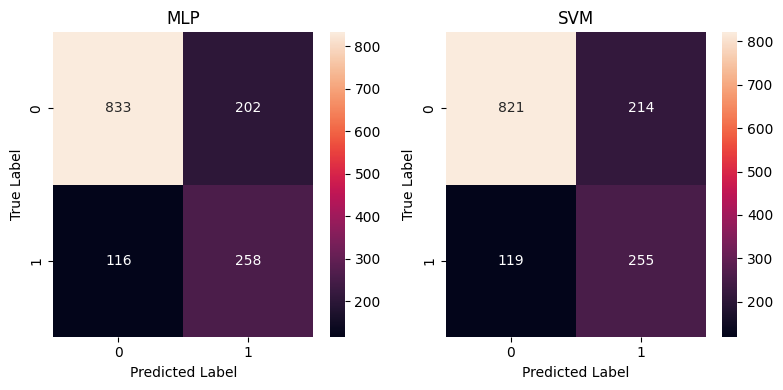

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.heatmap(metrics.confusion_matrix(y_test, predicted_mlp), annot=True, fmt='g', ax=axs[0]).set(title='MLP', ylabel='True Label', xlabel='Predicted Label')
sns.heatmap(metrics.confusion_matrix(y_test, predicted_svm), annot=True, fmt='g', ax=axs[1]).set(title='SVM', ylabel='True Label', xlabel='Predicted Label')
plt.tight_layout()
plt.show()

#### Curva ROC

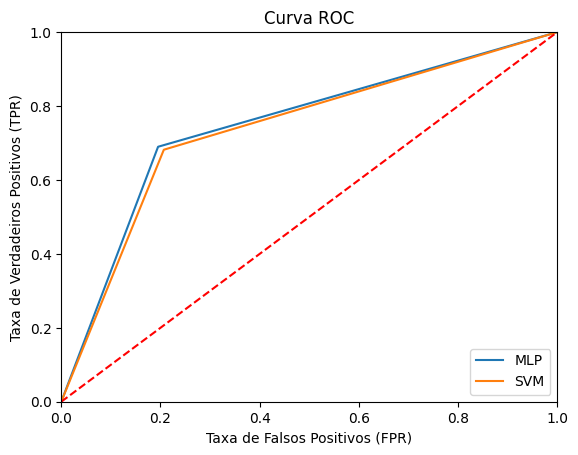

In [ ]:
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, predicted_mlp)
fpr_svm, tpr_svm, _ = roc_curve(y_test, predicted_svm)


plt.plot(fpr_mlp, tpr_mlp, label='MLP')
plt.plot(fpr_svm, tpr_svm, label='SVM')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()